In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Load dataset
df =pd.read_csv("Mall_Customers.csv")

In [3]:
# Basic preprocessing: use only numeric features
X = df.select_dtypes(include='number')


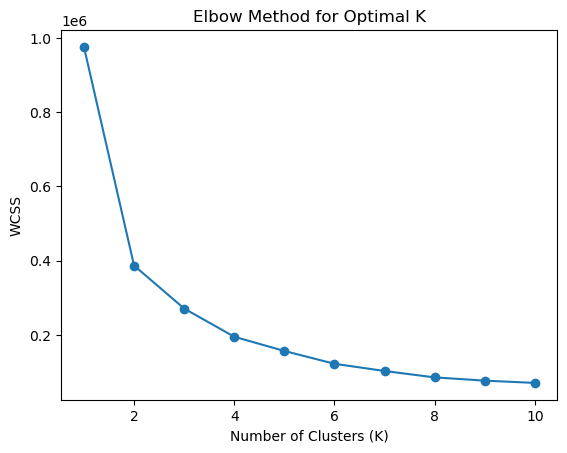

In [7]:
# 2. Elbow Method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()




In [8]:
# 3. Fit K-Means with chosen K (common choice = 5)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)


In [9]:
# 4. Silhouette Score
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.42477854750975896


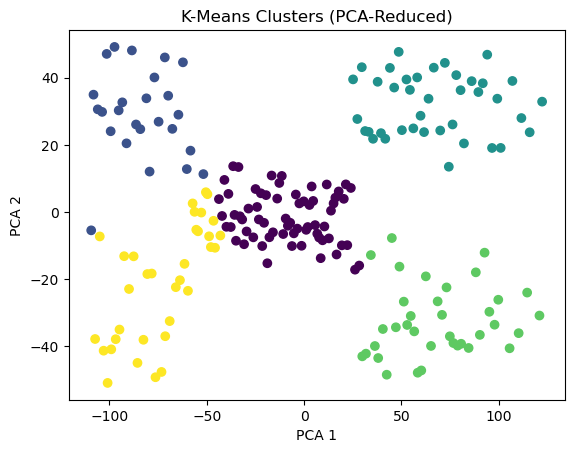

In [11]:
# 5. PCA 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clusters (PCA-Reduced)")
plt.show()
